## Графы, библиотека ```networkx```

Модель, которая не только описывает элементы системы, но и фиксирует связи между ними, называется **графом** или **сетью**. В терминах графов может быть описана любая система, в которой можно выделить

+ элементы (в графе они называются узлами = вершинами = nodes = vertices)
+ связи между ними (они именуются рёбрами = связями = edges = relations).

Граф -- это визуализация сложного объекта. Кроме того, граф — это математический объект, в котором мы можем довольно много всего посчитать, и таким образом установить разные закономерности, доказать гипотезу. Это называется **сетевым анализом**.

Для того, чтобы превращать данные (любые формализованные данные) в граф, можно использовать библиотеку `networkx`. Вот ее [документация](https://networkx.github.io/documentation/latest/index.html). Это не единственная библиотека для работы с графами в питоне ([вот полный список](https://wiki.python.org/moin/PythonGraphLibraries)), но, кажется, самая простая и удобная.

In [2]:
import networkx as nx

#### Создаем граф

Первая ситуация: у нас есть какие-то данные, и нам нужно превратить их в граф. Тогда уместно создать сначала пустой объект графа и туда постепенно что-то добавлять.

In [13]:
G = nx.Graph() # пустой граф
G.add_node(1) # добавляем один узел
G.add_nodes_from([2 ,3, 4, 5, 6]) # добавляем несколько узлов сразу

G.remove_node(6) # удаляем узел номер 6

# То, как мы обозначаем узлы (1, 2, 3 ...) -- это их id. Но вообще-то мы можем приклеить к ним и полноценные лейблы:
G.add_node(1, label="node_1")

Теперь укажем, какие узлы связаны между собой рёбрами.

In [14]:
G.add_edge(1,2) # ребро между узлами 1 и 3
G.add_edges_from([(1, 3), (1, 4), (1, 5), (4, 5), (3, 5)]) # сразу несколько рёбер

G.remove_edge(4, 5) # удаляем ребро

In [15]:
print('узлы', G.nodes())
print('рёбра', G.edges())

узлы [1, 2, 3, 4, 5]
рёбра [(1, 2), (1, 3), (1, 4), (1, 5), (3, 5)]


In [16]:
# сколько есть соседей у узла 5?
G.degree(5)

2

In [17]:
# узнаем число соседей (в терминах теории графов -- степень узла) каждого узла
for node in G.nodes():
    print (node, G.degree(node))

1 4
2 1
3 2
4 1
5 2


Кроме того, что графы отражают связи между узлами, они могут отражать характер этой связи. В теории графов выделяются специальные взвешенные графы, у которых между узлами не просто есть ребро, но у этого ребра ещё есть вес. Взвешенным графом, например, может быть граф персонажей какой-то пьесы, в котором мы учитываем не только то, что персонажи этой пьесы находятся вместе на сцене (ребро), но и сколько раз они вступают в диалог (вес ребра).

In [18]:
# вес ребра можно добавить так:

G.add_edge(1, 3, weight=4)

Отдельно выделяются направленные графы, которые отражают как наличие, так и направление связи. Например, граф переписки может отражать направление связи, кто кому писал. Или, например, можно отражать направление лексических/грамматических переходов. Такой граф задаётся как специальный тип объекта:

In [9]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)]) # от кого -- кому и вес ребра

Итак, суммируем. Графы бывают:

+ ориентированные (направленные) и неориентированные (связи-стрелочки vs обычные связи)
+ связные и несвязные (все узлы связаны vs есть узлы, которые оторваны от основного графа).
+ взвешенные и невзвешенные (связи имеют некоторое числовое значение или нет)


#### Сохраняем и подгружаем граф

Когда граф построен, его можно сохранить в каком-нибудь специальном формате.

+ csv-таблица узлов/ребер
+ gml (Graph Modelling Language) — простейший текстовый формат записи графа
+ graphml — основанный на XML формат для записи графов
+ gexf (Graph Exchange XML Format) — также основан на XML, позволяет описывать не только структуру и элементы графа, но и метаданные, иерархию, динамику — в общем, самый продвинутый формат

Чтобы сохранить граф в виде файла в формате .gexf, достаточно вот такого кода:

In [ ]:
nx.write_gexf(G, 'graph_file.gexf')

Загрузить данные из этого формата можно тоже одной строчкой:

In [ ]:
G1 = nx.read_gexf('graph_file.gexf')

#### Визуализация

Визуализируем граф с помощью уже знакомого нам `matplotlib` (но есть и [другие способы визуализации](https://networkx.github.io/documentation/networkx-2.2/reference/drawing.html) графов в питоне).

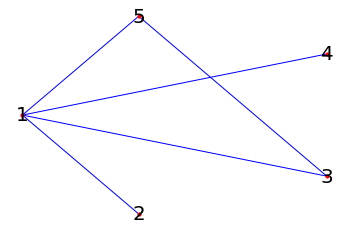

In [19]:
import matplotlib.pyplot as plt 

#надо выбрать способ "укладки" графа: random_layout, shell_layout, spring_layout
pos=nx.shell_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=20)
plt.axis('off') 
plt.show()

#### Сетевой анализ

Что мы можем узнать про граф?

In [21]:
# Диаметр графа, самый длинный путь от одной вершины до другой
print(nx.diameter(G))

# число узлов и рёбер

print(G.number_of_nodes())
print(G.number_of_edges())

# Плотность графа, отношение рёбер и узлов

print(nx.density(G))

# Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах" = узлах с большим количеством связей):

print(nx.degree_pearson_correlation_coefficient(G))

2
5
5
0.5
-0.8055555555555557


+ **Диаметр** — самый длинный путь от одной вершины до другой.

+ [**Связная компонента**](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D0%B0_%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B3%D1%80%D0%B0%D1%84%D0%B0) - узлы, связанные между собой рёбрами

+ **Коэффициент ассортативности (assortativity coefficient)** определяет, с кем связаны узлы-хабы (с большим количеством связей): если с другими узлами-хабами, то значение коэффициента высокое, а если нет – низкое.

+ **Плотность графа (density)** – отношение числа ребер к максимально возможному. В сообществах, высокий коэффициент кластеризации и высокая плотность.

+ **Степень, или мощность узла (degree)** – это количество его связей.

+ **Взвешенная степень (weighed degree)** – это количество связей узла, разделенное на общее количество связей в графе.

+ **Важность** узла можно определять разными способами:
    + **degree centrality**: у кого больше связей, тот и важнее
    + **closeness centrality**: чем центральнее узел (т.е. чем короче путь от него до всех остальных узлов), тем он важнее
    + **betweenness centrality**: количество кратчайших путей, проходящих через узел
    + **eigencentrality**: чем больше друзей у твоих друзей, тем ты важнее

Все это можно посчитать с помощью `networkx`, вот [соответсветствующий раздел документации](https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/centrality.html).

In [23]:
# Центральность узлов (важность узлов)

deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

1
3
5
2
4


In [22]:
b = nx.betweenness_centrality(G)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

1
2
3
4
5


**Коэффициент кластеризации (clustering coefficient)** – степень взаимодействия между собой ближайших соседей узла, т.е. вероятность того, что ближайшие соседи узла будут связаны не только с ним, но и между собой.

In [26]:
print(nx.average_clustering(G))
print(nx.transitivity(G)) # транзитивен ли граф, есть ли в нём треугольники?

0.4333333333333334
0.375


**Модулярность (modularity)** показывает, насколько при заданном разбиении графа на группы плотность связей внутри группы больше плотности связей между группами. С помощью этой метрики граф разбивается на сообщества.

**Сообщество** – это плотный подграф, где все (или почти все) узлы связаны между собой.

In [27]:
from networkx.algorithms import community

[Вот тут](https://networkx.github.io/documentation/latest/reference/algorithms/community.html) можно найти алгоритмы для выделения сообществ.

In [28]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [[1, 3, 4, 5], [2]]
next level communities: [[1, 3, 5], [2], [4]]


#### Пример

В качестве примера, в том числе, визуализации графа, даю ссылку на [работу Ильи Макарчука](https://colab.research.google.com/drive/1mxPMnEWB0F6A5LnpKRD5rg-tecyv3zIp#scrollTo=-FM1jXb_9-yr). Просьба не распространять

#### Gephi

Программа Gephi умеет делать вещи намного красивее, чем `matplotlib`, так что можно создать граф с помощью питона, а потом загрузить его в Gephi и считать статистику по графу и визуализировать его уже там. Или можно задать граф в csv-файлах (нужны отдельные файлы для узлов и для рёбер) и отредактировать, разбить на сообщества в Gephi. 

Хорошие тьюториалы по программе:

- https://www.youtube.com/watch?v=2FqM4gKeNO4

- https://www.youtube.com/watch?v=iQk1VOSMsbQ

#### Статьи с использованием графов

Библиография по лингвистическим (+ когнитивным) статьям, где используются графы:

https://cqllab.upc.edu/biblio/networks/

Обзор одной из этих статей может стать темой вашего эссе 